In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Hood_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Hood"]
Hood_Cpx['Sample_ID_Cpx']="Hood"

C:\Users\penny\AppData\Local\Temp\ipykernel_31360\1441611354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hood_Cpx['Sample_ID_Cpx']="Hood"


In [3]:
WangCopy=Hood_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Hood_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

In [4]:
len(WangCopy)

56

## Choose Crustal density

In [5]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


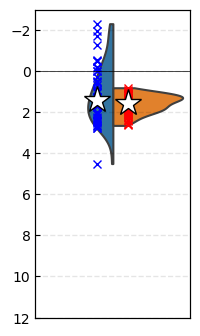

In [6]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Hood', 'Hood', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["Hood"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],  
         'xb')

ax1.plot(1.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")],  
         'xr')

ax1.plot(0.9,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
fig.savefig('Hood_Cpx.png', dpi=200)

In [8]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")])

1.426166617545615

In [9]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Hood")])

1.5509415422885566

## Amphibole

153
145


C:\Users\penny\AppData\Local\Temp\ipykernel_31360\3131563225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hood_Amp['Sample_ID_Amp']="Hood"
C:\Users\penny\AppData\Local\Temp\ipykernel_31360\3131563225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hood_Amp_Filt['Sample_ID_Amp']="Hood"
C:\Users\penny\AppData\Local\Temp\ipykernel_31360\3131563225.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

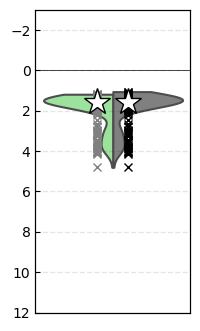

In [11]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
Hood_Amp=All_Amp.loc[All_Amp['Volcano']=="Hood"]
Hood_Amp['Sample_ID_Amp']="Hood"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
Hood_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="Hood"]
Hood_Amp_Filt['Sample_ID_Amp']="Hood"
Hood_Amp['Class']='Unfilt'
Hood_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([Hood_Amp_Filt, Hood_Amp], axis=0)

print(sum(Hood_Amp['P_kbar_calc']>-10))
print(sum(Hood_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,3.93), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=Hood_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*Hood_Amp_Filt['P_Ridolfi21'],
  Hood_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*Hood_Amp['P_Ridolfi21'],
  Hood_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(Hood_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(Hood_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Hood_Amp.png', dpi=200, transparent=True)

In [12]:
np.nanmedian(Hood_Amp_Filt['P_Ridolfi21'])

1.574581514202967

In [13]:
np.nanmedian(Hood_Amp['P_Ridolfi21'])

1.557944835996455

In [10]:
sum(Hood_Amp['P_kbar_calc']>-10)

145

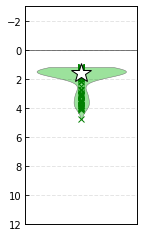

In [9]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


ax = sns.violinplot(y=Hood_Amp['P_Ridolfi21'],
                inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)


ax1.plot(0*Hood_Amp['P_Ridolfi21'],
  Hood_Amp['P_Ridolfi21'],
         'x', mec='green')

ax1.plot(0,
  np.nanmedian(Hood_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
# ax1.plot(0,
#   np.nanmean(Hood_Amp['P_Ridolfi21']),
#          'pk', mfc='w', ms=5)
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Hood_Amp.png', dpi=200)